In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pedidos = pd.read_csv('dtPedidos.csv')
pedidos['dtPedido'] = pd.to_datetime(pedidos['dtPedido'])

In [2]:
pedidos

,dtPedido,qtde_pedidos
0,2016-09-04,1
1,2016-09-05,1
2,2016-09-13,1
3,2016-09-15,1
4,2016-10-02,1
...,...,...
629,2018-09-29,1
630,2018-10-01,1
631,2018-10-03,1
632,2018-10-16,1


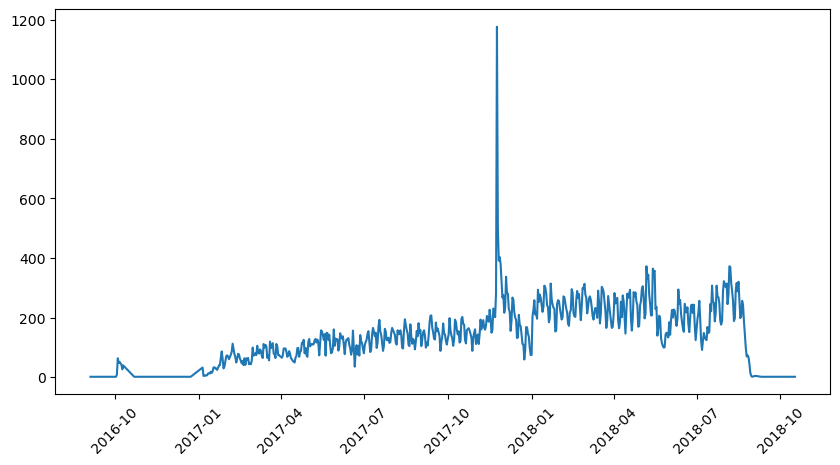

In [24]:
plt.figure(figsize=(10,5))
plt.plot(pedidos['dtPedido'], pedidos['qtde_pedidos'])
plt.xticks(rotation=45)
plt.show()

In [4]:
import plotly.express as px

fig = px.line(pedidos, x='dtPedido', y='qtde_pedidos')
fig.show()

In [5]:
qt_pedidos = pd.read_csv('qtPedidos.csv')
qt_pedidos

,idVendedor,descTipoPagamento,qtdePedidoMeioPagamento,vlPedidoMeioPagamento
0,0015a82c2db000af6aaaf3ae2ecb0532,credit_card,3,2748.060059
1,001cca7ae9ae17fb1caed9dfb1094831,boleto,25,5695.210068
2,001cca7ae9ae17fb1caed9dfb1094831,credit_card,92,19143.770065
3,001cca7ae9ae17fb1caed9dfb1094831,debit_card,2,264.160004
4,001cca7ae9ae17fb1caed9dfb1094831,voucher,1,140.080002
...,...,...,...,...
3140,ffeee66ac5d5a62fe688b9d26f83f534,boleto,2,328.519989
3141,ffeee66ac5d5a62fe688b9d26f83f534,credit_card,7,1191.159973
3142,fffd5413c0700ac820c7069d66d98c89,boleto,3,469.029995
3143,fffd5413c0700ac820c7069d66d98c89,credit_card,15,4223.070072


In [6]:
qt_pedidos = pd.read_csv('qtPedidos.csv')
qt_pedidos

qt_pedidos_pivot = qt_pedidos.pivot_table(index='idVendedor', 
                                          columns='descTipoPagamento', 
                                          values='qtdePedidoMeioPagamento')
qt_pedidos_pivot = qt_pedidos_pivot.rename(columns={'boleto':'qtde_boleto',
                                 'credit_card': 'qtde_credit_card',
                                 'debit_card': 'qtde_debit_card',
                                 'voucher': 'qtde_voucher'})

vl_pedidos_pivot = qt_pedidos.pivot_table(index='idVendedor', 
                                          columns='descTipoPagamento', 
                                          values='vlPedidoMeioPagamento')
vl_pedidos_pivot
vl_pedidos_pivot = vl_pedidos_pivot.rename(columns={'boleto':'vl_boleto',
                                 'credit_card': 'vl_credit_card',
                                 'debit_card': 'vl_debit_card',
                                 'voucher': 'vl_voucher'})

qt_pedidos_formatado = pd.merge(qt_pedidos_pivot, vl_pedidos_pivot, on='idVendedor')
qt_pedidos_formatado


descTipoPagamento,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,vl_boleto,vl_credit_card,vl_debit_card,vl_voucher
idVendedor,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,NaN,3.0,NaN,NaN,NaN,2748.060059,NaN,NaN
001cca7ae9ae17fb1caed9dfb1094831,25.0,92.0,2.0,1.0,5695.210068,19143.770065,264.160004,140.080002
002100f778ceb8431b7a1020ff7ab48f,16.0,21.0,NaN,5.0,788.489998,776.630000,NaN,139.680000
003554e2dce176b5555353e4f3555ac8,NaN,1.0,NaN,NaN,NaN,139.380005,NaN,NaN
004c9cd9d87a3c30c522c48c4fc07416,21.0,69.0,NaN,4.0,2823.389999,10304.139988,NaN,445.029998
...,...,...,...,...,...,...,...,...
ff69aa92bb6b1bf9b8b7a51c2ed9cf8b,1.0,3.0,NaN,NaN,1028.619995,3007.140015,NaN,NaN
ff82e8873fba613f2261a9acc896fd84,NaN,1.0,NaN,NaN,NaN,31.010000,NaN,NaN
ffdd9f82b9a447f6f8d4b91554cc7dd3,2.0,4.0,NaN,NaN,200.790001,1742.029991,NaN,NaN


In [7]:
# Calcula a porcentagem de cada coluna de quantidade
def calcular_porcentagem_qt(coluna):
    return coluna / qt_pedidos_formatado[['qtde_boleto',
                                          'qtde_credit_card', 
                                          'qtde_debit_card', 
                                          'qtde_voucher']].sum(axis=1)

# Adiciona as novas colunas de porcentagem
qt_pedidos_formatado = qt_pedidos_formatado.assign(
    porc_qtde_boleto=calcular_porcentagem_qt(qt_pedidos_formatado['qtde_boleto']),
    porc_qtde_credit_card=calcular_porcentagem_qt(qt_pedidos_formatado['qtde_credit_card']),
    porc_qtde_debit_card=calcular_porcentagem_qt(qt_pedidos_formatado['qtde_debit_card']),
    porc_qtde_voucher=calcular_porcentagem_qt(qt_pedidos_formatado['qtde_voucher'])
)


def calcular_porcentagem_vl(coluna):
    return coluna / qt_pedidos_formatado[['vl_boleto',
                                         'vl_credit_card', 
                                         'vl_debit_card', 
                                         'vl_voucher']].sum(axis=1)

# Adiciona as novas colunas de porcentagem
qt_pedidos_formatado = qt_pedidos_formatado.assign(
    porc_vl_boleto=calcular_porcentagem_vl(qt_pedidos_formatado['vl_boleto']),
    porc_vl_credit_card=calcular_porcentagem_vl(qt_pedidos_formatado['vl_credit_card']),
    porc_vl_debit_card=calcular_porcentagem_vl(qt_pedidos_formatado['vl_debit_card']),
    porc_vl_voucher=calcular_porcentagem_vl(qt_pedidos_formatado['vl_voucher'])
)

In [8]:
qt_pedidos_formatado = qt_pedidos_formatado.fillna(0)
qt_pedidos_formatado

descTipoPagamento,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,vl_boleto,vl_credit_card,vl_debit_card,vl_voucher,porc_qtde_boleto,porc_qtde_credit_card,porc_qtde_debit_card,porc_qtde_voucher,porc_vl_boleto,porc_vl_credit_card,porc_vl_debit_card,porc_vl_voucher
idVendedor,,,,,,,,,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,0.0,3.0,0.0,0.0,0.000000,2748.060059,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
001cca7ae9ae17fb1caed9dfb1094831,25.0,92.0,2.0,1.0,5695.210068,19143.770065,264.160004,140.080002,0.208333,0.766667,0.016667,0.008333,0.225613,0.758373,0.010465,0.005549
002100f778ceb8431b7a1020ff7ab48f,16.0,21.0,0.0,5.0,788.489998,776.630000,0.000000,139.680000,0.380952,0.500000,0.000000,0.119048,0.462512,0.455555,0.000000,0.081933
003554e2dce176b5555353e4f3555ac8,0.0,1.0,0.0,0.0,0.000000,139.380005,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
004c9cd9d87a3c30c522c48c4fc07416,21.0,69.0,0.0,4.0,2823.389999,10304.139988,0.000000,445.029998,0.223404,0.734043,0.000000,0.042553,0.208022,0.759189,0.000000,0.032789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff69aa92bb6b1bf9b8b7a51c2ed9cf8b,1.0,3.0,0.0,0.0,1028.619995,3007.140015,0.000000,0.000000,0.250000,0.750000,0.000000,0.000000,0.254876,0.745124,0.000000,0.000000
ff82e8873fba613f2261a9acc896fd84,0.0,1.0,0.0,0.0,0.000000,31.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3,2.0,4.0,0.0,0.0,200.790001,1742.029991,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000,0.103350,0.896650,0.000000,0.000000
